# **PREDICTING CUSTOMER INSURANCE CLAIM**
---
This project aim to predict how much a person might be charged for medical insurance based on their personal information. The dataset includes details like age, gender, body mass index (BMI), number of children, smoking habits, and where they live. Using these factors, we build a simple Linear Regression model to estimate insurance costs.
We also explore how important features like BMI, age, and smoking status affect the charges, by visualizing their impact. Finally, we check how well our model performs using common error measurements (MAE and RMSE) to see how close our predictions are to the actual costs.

This project helps us understand the relationship between personal health data and insurance charges, and how to use machine learning to make useful predictions

---

## Dataset Overview
---
**Source:** https://www.kaggle.com/datasets/mirichoi0218/insurance

**Description:** This Dataset contains information about Medical Information through which we can predict insurance Cost.It includes 7 columns that are:

- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
  objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance

## **Step 1: Data Loading**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model


In [11]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Checking Dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### The Dataset has no any null values so we can easily step to model training

## **Step 2: Training Model**

### Converting Categories into Numeric data for training

In [20]:
from sklearn.preprocessing import LabelEncoder
# Making copy of data so that it can't effect our original dataset
data=df.copy()
# Using label Encoder to convert categorical column into numeric.
# It will convert yes=1 and no=0
le=LabelEncoder()
data["Smoker_encoded"]=le.fit_transform(data["smoker"])


### Linear Regression model training

In [34]:
model=linear_model.LinearRegression()
X=data[["bmi","age","Smoker_encoded"]]
Y=data["charges"]
model.fit(X,Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
model.coef_

array([  322.61513282,   259.54749155, 23823.68449531])

In [38]:
model.intercept_

-11676.830425187778

### Predicting a Random Value

In [40]:
# Let's predict a value
test_value=[[29,19,0]]
predicted_value=model.predict(test_value)
print("Predicted Insurance Charge=",predicted_value[0])

Predicted Insurance Charge= 2610.4107660509726


C:\Users\humna\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## **Step 3: Evaluating Model Performance By MAE and RMSE**

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
y_predict=model.predict(X)
mae=mean_absolute_error(Y,y_predict)
# rmse=mean_squared_error(Y,y_predict,squared=False)
rmse=np.sqrt(mean_squared_error(Y, y_predict))

print("MAE:",mae)
print("RMSE:",rmse)

MAE: 4216.775692234114
RMSE: 6083.20604208895


## **Step 4: Visualization**

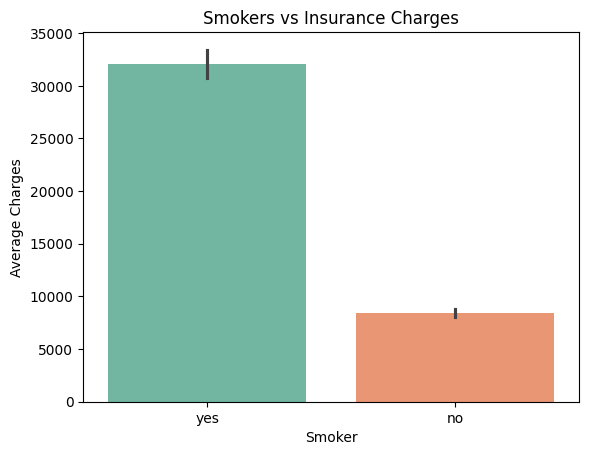

In [97]:
sns.barplot(data=df,x="smoker",y="charges",hue="smoker",palette="Set2")
plt.title("Smokers vs Insurance Charges")
plt.xlabel("Smoker")
plt.ylabel("Average Charges")
plt.show()

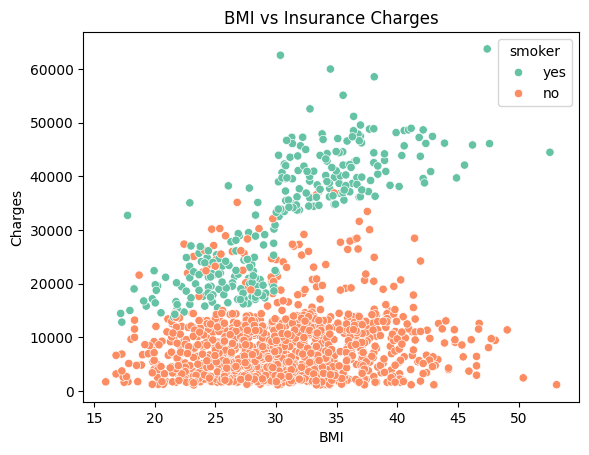

In [89]:
sns.scatterplot(data=df,x="bmi",y="charges",hue="smoker",palette="Set2")
plt.title("BMI vs Insurance Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

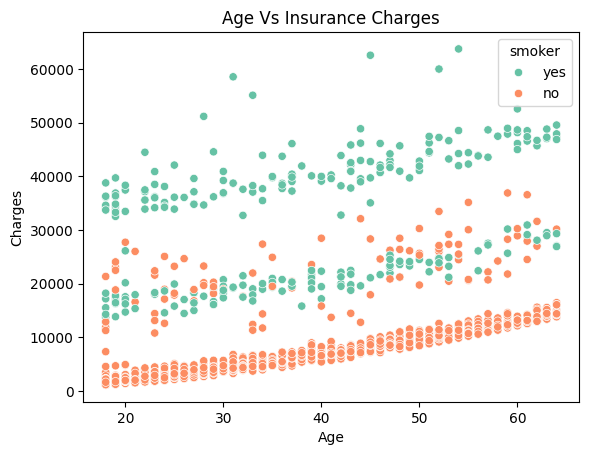

In [99]:
sns.scatterplot(data=df,x="age",y="charges",hue="smoker",palette="Set2")
plt.title("Age Vs Insurance Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

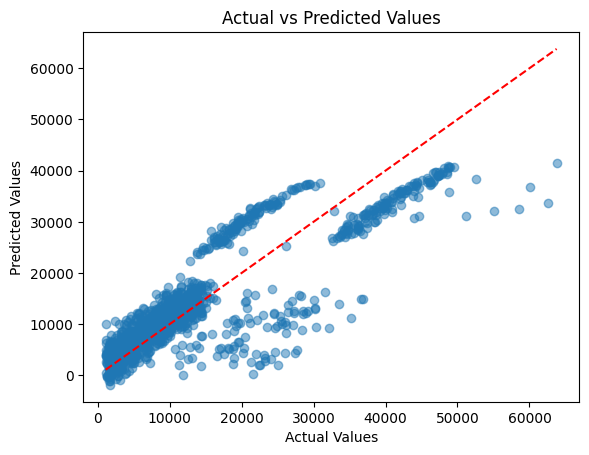

In [108]:
plt.scatter(Y,y_predict,alpha=0.5)
plt.plot([Y.min(),Y.max()],[Y.min(),Y.max()],'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

## **Conclusion**

The regression model predicts insurance charges with reasonable accuracy. The evaluation metrics and visualization confirm that the model captures the general trend but has some prediction errors.

Key Findings:

- The insurance charges of smoker is higher than non-smokers
- MAE and RMSE indicate moderate prediction errors, showing the model’s practical usefulness.
- Actual vs predicted scatter plot points mostly align along the ideal diagonal line, indicating good prediction quality.
